In [6]:
import matplotlib.pyplot as plt
import simexpal
import yaml

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

#results

## Exercise 4

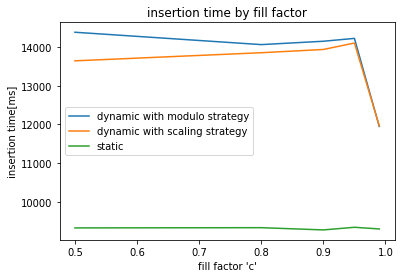

In [8]:
def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

x = vec('static', 'max_fill')

# plot the insertion
plt.plot(x, vec('dynamic_modulo', 'time'), label = 'dynamic with modulo strategy')
plt.plot(x, vec('dynamic_scaling', 'time'), label = 'dynamic with scaling strategy')
plt.plot(x, vec('static', 'time'), label = 'static')
#plt.plot(x, vec('stl', 'time'), label = 'stl')
plt.title('insertion time by fill factor')
plt.xlabel("fill factor 'c'")
plt.ylabel('insertion time[ms]')
plt.legend()
plt.show()

In [15]:
import subprocess
test = subprocess.Popen(["perf"," stat","-e","cache-misses","./dev-builds/hashing/bin/hashing","--algo","dynamic_modulo"], stdout=subprocess.PIPE)
output = test.communicate()[0]
output

FileNotFoundError: [Errno 2] No such file or directory: 'perf'